In [2]:
import pandas as pd
df= pd.read_csv('/content/TSLA.csv')
print(df)


            Date         Open         High         Low        Close  \
0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.919983   

        Adj Close    Volume  
0        4.778000  93831500  
1        4.766000  85935500  
2        4.392000  41094000  
3        3.840000  25699000

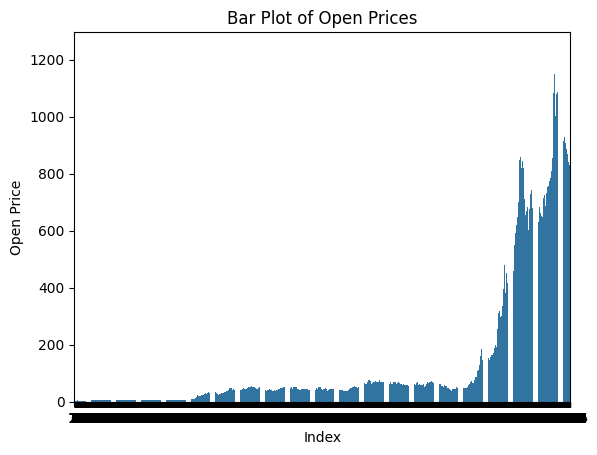

In [5]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_url = "/content/TSLA.csv"  # Replace "link_to_your_dataset.csv" with the actual link
df = pd.read_csv(data_url)

# Assuming 'Open' column is the one you want to plot
sns.barplot(x=df.index, y='Open', data=df)
plt.title('Bar Plot of Open Prices')
plt.xlabel('Index')
plt.ylabel('Open Price')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4873096446700508
Confusion Matrix:
 [[  0 303]
 [  0 288]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       303
         1.0       0.49      1.00      0.66       288

    accuracy                           0.49       591
   macro avg       0.24      0.50      0.33       591
weighted avg       0.24      0.49      0.32       591



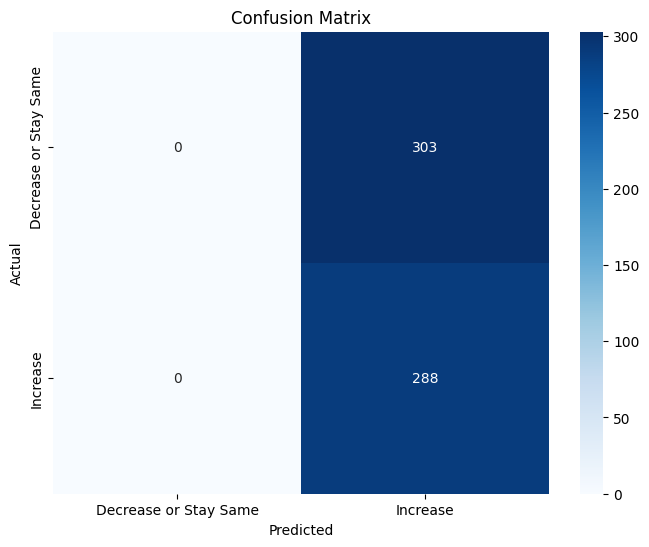

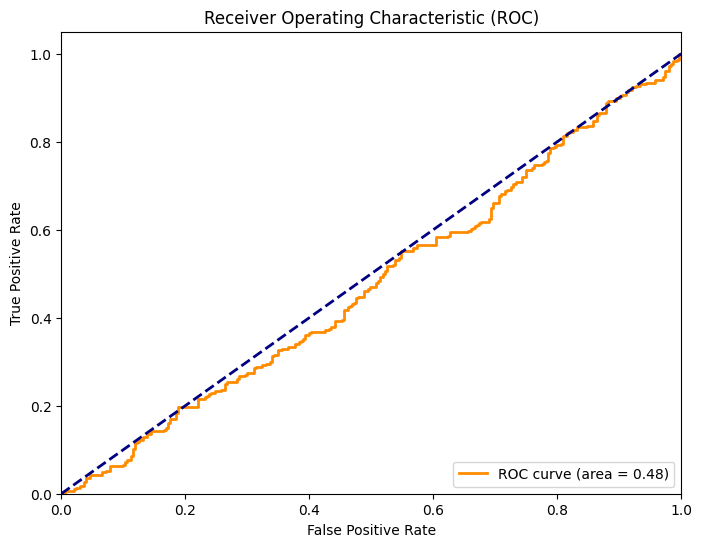

In [6]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Load the dataset
data_url = "/content/TSLA.csv"  # Replace "link_to_your_dataset.csv" with the actual link
df = pd.read_csv(data_url)

# Convert closing prices into categories (e.g., 1 for increase, 0 for decrease or stay the same)
df['PriceChange'] = df['Close'].diff().apply(lambda x: 1 if x > 0 else 0).shift(-1)

# Drop the last row since it has a NaN value due to shifting
df.dropna(inplace=True)

# Assuming your dataset has features (independent variables) and a target variable (dependent variable)
# Replace 'features' and 'target' with actual column names from your dataset
features = df[['Open', 'High', 'Low', 'Volume']]  # Example feature columns
target = df['PriceChange']  # Modified target variable for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Decrease or Stay Same', 'Increase'], yticklabels=['Decrease or Stay Same', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.4653130287648054
Confusion Matrix:
 [[124 179]
 [137 151]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.41      0.44       303
         1.0       0.46      0.52      0.49       288

    accuracy                           0.47       591
   macro avg       0.47      0.47      0.46       591
weighted avg       0.47      0.47      0.46       591



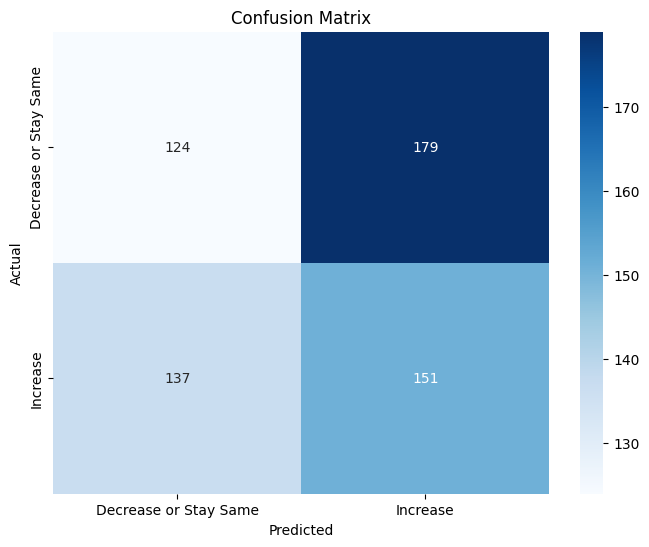

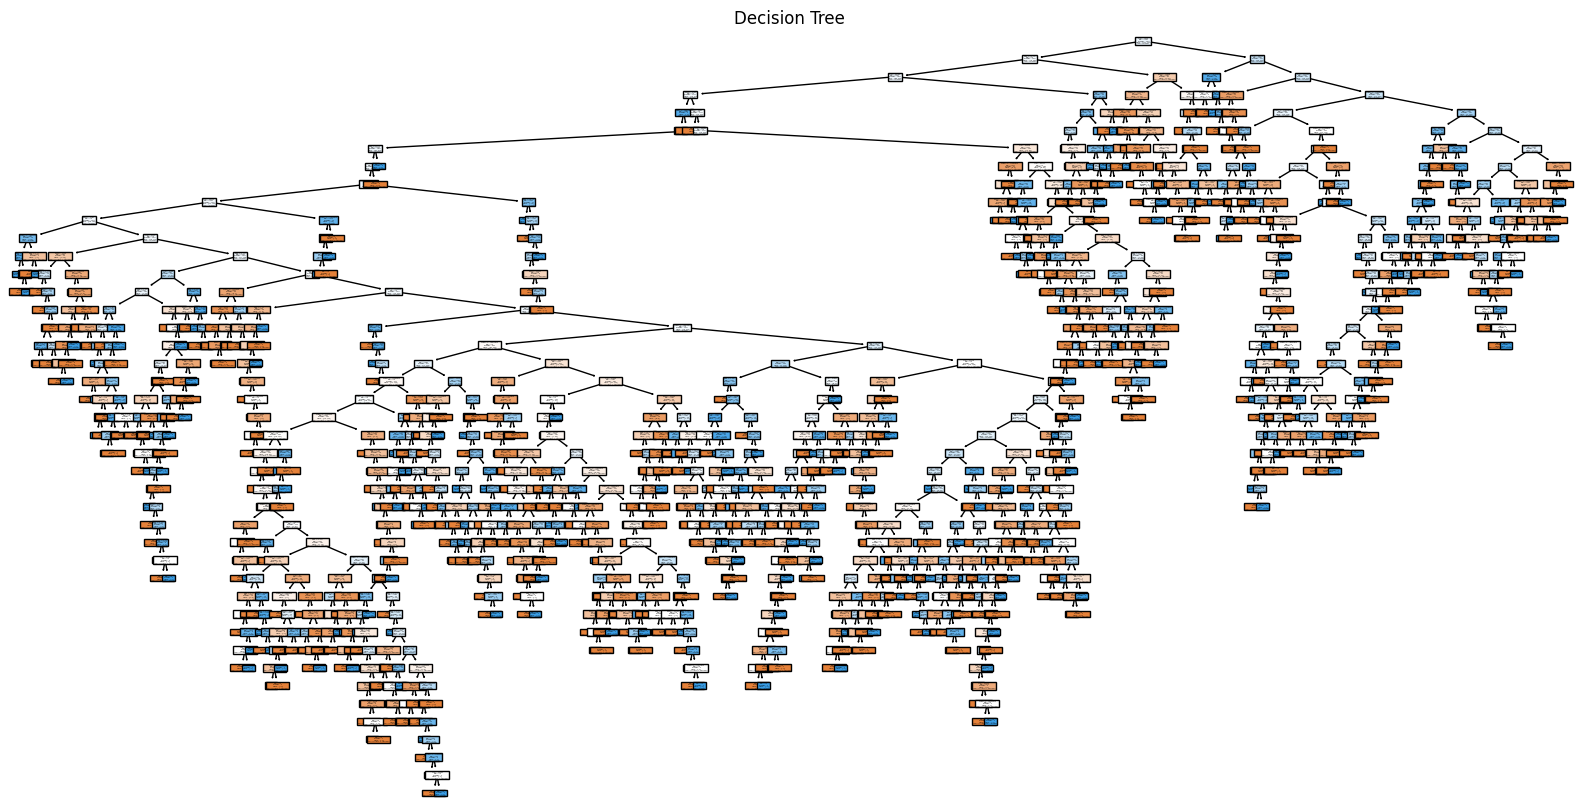

In [7]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import DecisionTreeClassifier and plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data_url = "/content/TSLA.csv"  # Replace "link_to_your_dataset.csv" with the actual link
df = pd.read_csv(data_url)

# Convert closing prices into categories (e.g., 1 for increase, 0 for decrease or stay the same)
df['PriceChange'] = df['Close'].diff().apply(lambda x: 1 if x > 0 else 0).shift(-1)

# Drop the last row since it has a NaN value due to shifting
df.dropna(inplace=True)

# Assuming your dataset has features (independent variables) and a target variable (dependent variable)
# Replace 'features' and 'target' with actual column names from your dataset
features = df[['Open', 'High', 'Low', 'Volume']]  # Example feature columns
target = df['PriceChange']  # Modified target variable for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the decision tree model
decision_tree_model = DecisionTreeClassifier()  # Change to DecisionTreeClassifier

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Decrease or Stay Same', 'Increase'], yticklabels=['Decrease or Stay Same', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=features.columns, class_names=['Decrease or Stay Same', 'Increase'])
plt.title("Decision Tree")
plt.show()


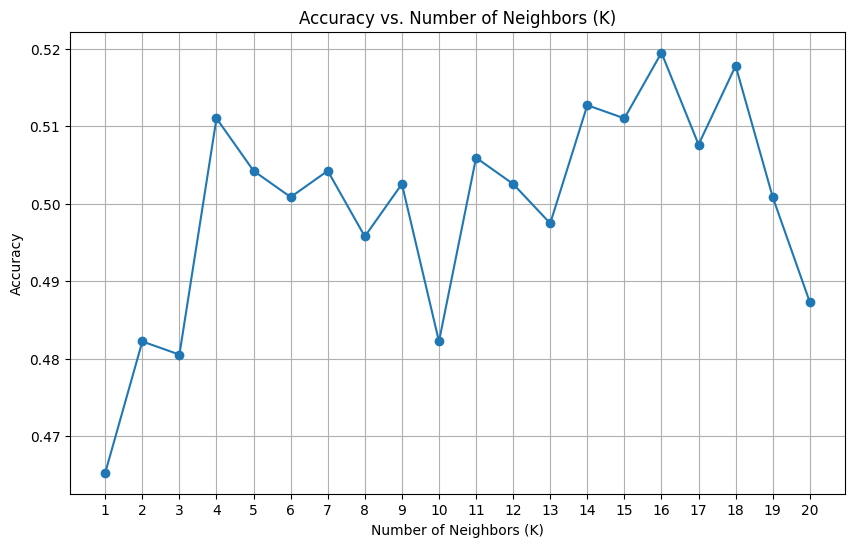

Best k: 16
Accuracy with best k: 0.5194585448392555
Confusion Matrix with best k:
 [[163 140]
 [144 144]]
Classification Report with best k:
               precision    recall  f1-score   support

         0.0       0.53      0.54      0.53       303
         1.0       0.51      0.50      0.50       288

    accuracy                           0.52       591
   macro avg       0.52      0.52      0.52       591
weighted avg       0.52      0.52      0.52       591



In [8]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data_url = "/content/TSLA.csv"  # Replace "link_to_your_dataset.csv" with the actual link
df = pd.read_csv(data_url)

# Convert closing prices into categories (e.g., 1 for increase, 0 for decrease or stay the same)
df['PriceChange'] = df['Close'].diff().apply(lambda x: 1 if x > 0 else 0).shift(-1)

# Drop the last row since it has a NaN value due to shifting
df.dropna(inplace=True)

# Assuming your dataset has features (independent variables) and a target variable (dependent variable)
# Replace 'features' and 'target' with actual column names from your dataset
features = df[['Open', 'High', 'Low', 'Volume']]  # Example feature columns
target = df['PriceChange']  # Modified target variable for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize variables to store accuracies for different k values
k_values = list(range(1, 21))  # Test k values from 1 to 20
accuracies = []

# Loop through different k values
for k in k_values:
    # Initialize the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_model.predict(X_test)

    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid(True)
plt.show()

# Choose the best k based on the plot above
best_k = k_values[np.argmax(accuracies)]
print("Best k:", best_k)

# Now, let's train the KNN model with the best k and print evaluation metrics
# Initialize the KNN model with the best k
knn_model_best = KNeighborsClassifier(n_neighbors=best_k)

# Train the model
knn_model_best.fit(X_train, y_train)

# Predict on the test set
y_pred_best = knn_model_best.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# Print the evaluation metrics for the model with the best k
print("Accuracy with best k:", accuracy_best)
print("Confusion Matrix with best k:\n", conf_matrix_best)
print("Classification Report with best k:\n", classification_rep_best)


Accuracy: 0.47715736040609136
Confusion Matrix:
 [[101 202]
 [107 181]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.33      0.40       303
         1.0       0.47      0.63      0.54       288

    accuracy                           0.48       591
   macro avg       0.48      0.48      0.47       591
weighted avg       0.48      0.48      0.47       591



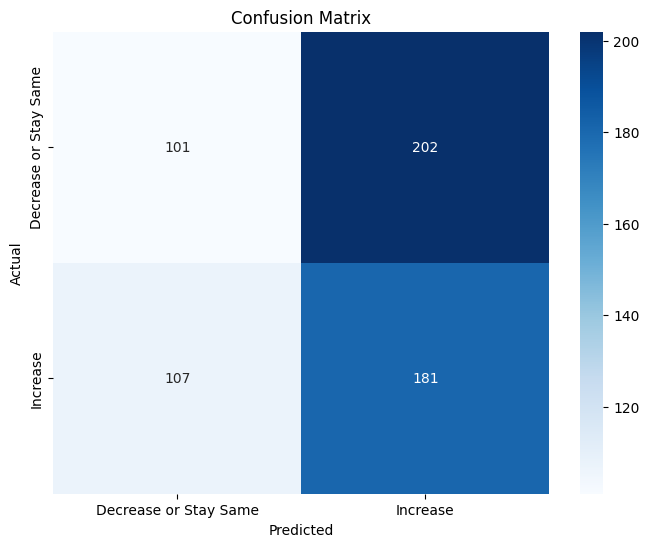

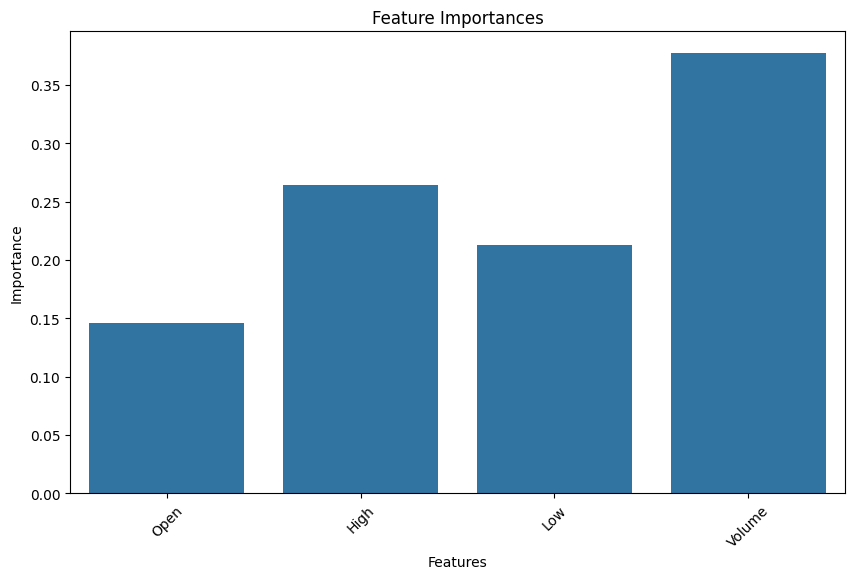

In [5]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = "/content/TSLA.csv"  # Replace "link_to_your_dataset.csv" with the actual link
df = pd.read_csv(data_url)

# Convert closing prices into categories (e.g., 1 for increase, 0 for decrease or stay the same)
df['PriceChange'] = df['Close'].diff().apply(lambda x: 1 if x > 0 else 0).shift(-1)

# Drop the last row since it has a NaN value due to shifting
df.dropna(inplace=True)

# Assuming your dataset has features (independent variables) and a target variable (dependent variable)
# Replace 'features' and 'target' with actual column names from your dataset
features = df[['Open', 'High', 'Low', 'Volume']]  # Example feature columns
target = df['PriceChange']  # Modified target variable for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Decrease or Stay Same', 'Increase'], yticklabels=['Decrease or Stay Same', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
feature_importances = gb_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features.columns, y=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


Accuracy: 0.4805414551607445
Confusion Matrix:
 [[ 70 233]
 [ 74 214]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.23      0.31       303
         1.0       0.48      0.74      0.58       288

    accuracy                           0.48       591
   macro avg       0.48      0.49      0.45       591
weighted avg       0.48      0.48      0.44       591



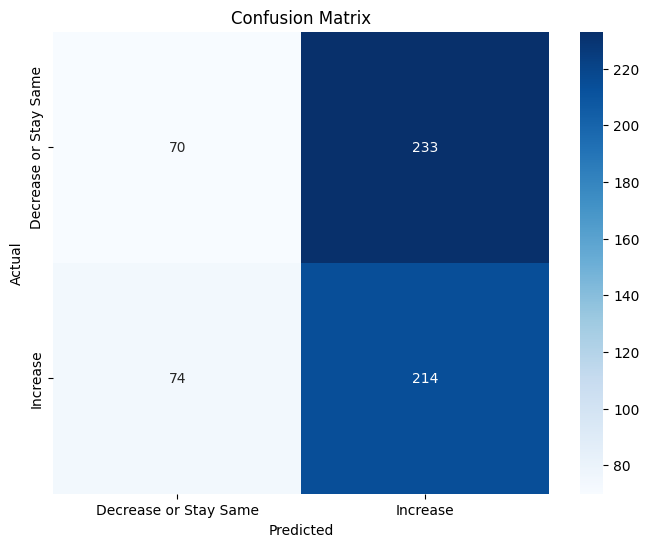

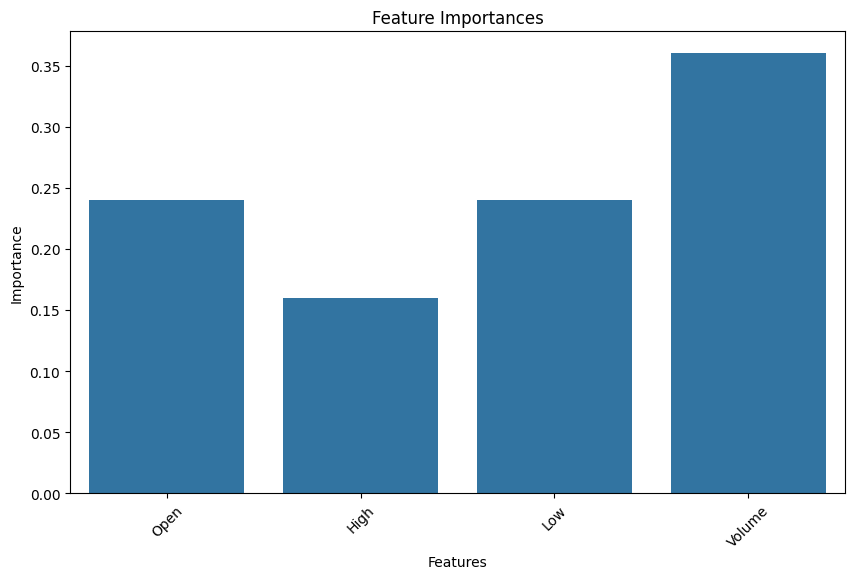

In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = "/content/TSLA.csv"  # Replace "link_to_your_dataset.csv" with the actual link
df = pd.read_csv(data_url)

# Convert closing prices into categories (e.g., 1 for increase, 0 for decrease or stay the same)
df['PriceChange'] = df['Close'].diff().apply(lambda x: 1 if x > 0 else 0).shift(-1)

# Drop the last row since it has a NaN value due to shifting
df.dropna(inplace=True)

# Assuming your dataset has features (independent variables) and a target variable (dependent variable)
# Replace 'features' and 'target' with actual column names from your dataset
features = df[['Open', 'High', 'Low', 'Volume']]  # Example feature columns
target = df['PriceChange']  # Modified target variable for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Decrease or Stay Same', 'Increase'], yticklabels=['Decrease or Stay Same', 'Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importances
feature_importances = adaboost_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=features.columns, y=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE, MAE, and MSE for the testing set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
test_mae = mean_absolute_error(y_test, y_pred)  # MAE
test_mse = mean_squared_error(y_test, y_pred)  # MSE

# Print the results
print("Testing RMSE:", test_rmse)
print("Testing MAE:", test_mae)
print("Testing MSE:", test_mse)


Testing RMSE: 0.7230785846599999
Testing MAE: 0.5228426395939086
Testing MSE: 0.5228426395939086
